In [1]:
# installing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# load the data
dataset = load_breast_cancer() 

<function matplotlib.pyplot.show(close=None, block=None)>

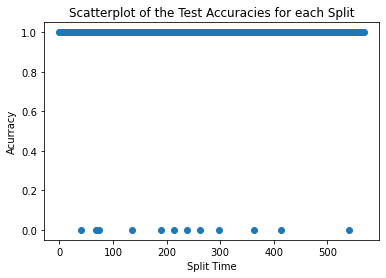

In [2]:
# create the pipeline model with cross validator
model = make_pipeline(StandardScaler(), LogisticRegression())
loo = LeaveOneOut()

X = dataset.data
y = dataset.target
acc_score = []
counts = []
n = 0

# modelling on each split training set
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)   
    acc_score.append(acc)
    
    counts.append(n)
    n = n+1
    
# plotting 
plt.scatter(counts, acc_score)
plt.xlabel('Split Time')
plt.ylabel('Acurracy')
plt.title('Scatterplot of the Test Accuracies for each Split')
plt.show